In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import datetime as dt
import pandas_datareader as web
import yfinance as yahoofinance

In [2]:
#Placing the S&P500 stocks in a value
sp500 = ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT',
         'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP',
         'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN',
         'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN',
         'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS',
         'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 
         'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX',
         'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK',
         'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BRO',
         'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT',
         'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW',
         'CE', 'CEG', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR',
         'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG',
         'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST',
         'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS',
         'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR',
         'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR',
         'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW',
         'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC',
         'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN',
         'EMR', 'ENPH', 'EOG', 'EPAM', 'EQIX', 'EQR', 'ES', 'ESS',
         'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR',
         'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDS', 'FDX', 'FE',
         'FFIV', 'FIS', 'FISV', 'FITB', 'FLT', 'FMC', 'FOX', 'FOXA',
         'FRC', 'FRT', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL',
         'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GRMN', 
         'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD', 'HES', 'HIG',
         'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 
         'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF',
         'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV',
         'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI',
         'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM',
         'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEN',
         'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW',
         'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA',
         'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET',
         'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 
         'MOH', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 
         'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 
         'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOW', 
         'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS',
         'NWSA', 'NXPI', 'O', 'ODFL', 'OGN', 'OKE', 'OMC', 'ORCL', 'ORLY',
         'OTIS', 'OXY', 'PARA', 'PAYC', 'PAYX', 'PCAR', 'PEAK', 'PEG', 'PENN',
         'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD',
         'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX',
         'PTC', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG',
         'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST',
         'RSG', 'RTX', 'SBAC', 'SBNY', 'SBUX', 'SCHW', 'SEDG', 'SEE', 'SHW',
         'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE',
         'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T',
         'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT',
         'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA',
         'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA',
         'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB',
         'V', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR',
         'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC',
         'WHR', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WTW', 'WY',
         'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']

In [3]:
#Downloading the data and getting various statistics
ticker = sp500

if ticker == sp500:
    data = yahoofinance.download(ticker)
    symbols = yahoofinance.Tickers(ticker)
    data = symbols.history(period='1y', interval='1d')
    returns = data.Close - data.Close.shift(1)
    correlation = data.Close.corr()
    mean = data.Close.mean()
    stdev = data.Close.std()
    zscore = (data.Close - mean)/stdev
    sp500_returns = data.Close - data.Close.shift(1)
    total = sp500_returns.sum()
    sp500_rank = total.rank()
    sp500_max_rank = total.rank(method='max')
    sp500_bottom_rank = total.rank(na_option='bottom')
else:
    print('No data available')

[*********************100%***********************]  505 of 505 completed

15 Failed downloads:
- DISCK: No data found, symbol may be delisted
- FBHS: No data found for this date range, symbol may be delisted
- KMX: No data found for this date range, symbol may be delisted
- EMR: No data found for this date range, symbol may be delisted
- TEL: No data found for this date range, symbol may be delisted
- FAST: No data found for this date range, symbol may be delisted
- RMD: No data found for this date range, symbol may be delisted
- ANTM: No data found, symbol may be delisted
- DISCA: No data found, symbol may be delisted
- AKAM: No data found for this date range, symbol may be delisted
- BLL: No data found, symbol may be delisted
- NTRS: No data found for this date range, symbol may be delisted
- TDY: No data found for this date range, symbol may be delisted
- FB: No data found, symbol may be delisted
- CERN: No data found, symbol may be delisted
[*********************100%***************

In [4]:
correlation = data.Close.corr()

In [5]:
data.Close.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-14 00:00:00,151.618988,19.639999,208.708160,142.958923,105.892563,118.550514,345.070007,116.175278,334.476959,607.510010,...,91.639999,63.655956,59.317192,56.259251,121.846100,122.767189,140.219421,511.350006,61.100864,199.115356
2021-10-15 00:00:00,152.294678,19.980000,209.261810,144.032898,106.300926,118.303764,351.369995,116.096222,337.219513,610.090027,...,90.709999,64.142403,59.881664,57.148335,123.149788,122.924263,140.922302,515.830017,60.613152,200.933716
2021-10-18 00:00:00,153.795059,19.840000,216.148819,145.733368,104.453568,116.842987,351.059998,115.434181,338.561188,622.830017,...,90.800003,62.926292,59.852962,55.636894,123.544846,124.141617,139.583923,526.919983,60.700935,201.440475
2021-10-19 00:00:00,154.629715,19.530001,217.722443,147.931061,104.473007,118.284027,349.410004,117.924278,345.032898,636.070007,...,91.620003,63.169518,60.752281,56.851971,123.959663,123.415131,143.387192,528.630005,61.695877,203.139603
2021-10-20 00:00:00,156.587173,19.520000,220.170288,148.428268,105.406410,120.662735,346.420013,121.847191,341.145935,632.369995,...,90.940002,63.792160,61.087139,57.464451,124.996689,123.582031,144.552231,527.059998,63.500416,204.997711


In [6]:
sp500_returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-15 00:00:00,0.675690,0.340000,0.553650,1.073975,0.408363,-0.246750,6.299988,-0.079056,2.742554,2.580017,...,-0.930000,0.486446,0.564472,0.889084,1.303688,0.157074,0.702881,4.480011,-0.487713,1.818359
2021-10-18 00:00:00,1.500381,-0.139999,6.887009,1.700470,-1.847359,-1.460777,-0.309998,-0.662041,1.341675,12.739990,...,0.090004,-1.216110,-0.028702,-1.511440,0.395058,1.217354,-1.338379,11.089966,0.087784,0.506760
2021-10-19 00:00:00,0.834656,-0.309999,1.573624,2.197693,0.019440,1.441040,-1.649994,2.490097,6.471710,13.239990,...,0.820000,0.243225,0.899319,1.215076,0.414818,-0.726486,3.803268,1.710022,0.994942,1.699127
2021-10-20 00:00:00,1.957458,-0.010000,2.447845,0.497208,0.933403,2.378708,-2.989990,3.922913,-3.886963,-3.700012,...,-0.680000,0.622643,0.334858,0.612480,1.037025,0.166901,1.165039,-1.570007,1.804539,1.858109


In [7]:
print(total.to_string())

A        -23.718987
AAL       -6.589999
AAP      -37.128159
AAPL       0.031082
ABBV      37.027435
ABC       23.499489
ABMD     -86.990021
ABT      -13.705276
ACN      -77.016968
ADBE    -312.770020
ADI      -22.426788
ADM       25.946491
ADP       25.196182
ADSK     -95.320007
AEE       -4.576965
AEP        3.515915
AES        0.786131
AFL        5.738518
AIG       -5.491394
AIZ       -8.824844
AJG       18.946182
AKAM     -24.809998
ALB       26.178238
ALGN    -385.409973
ALK      -15.619999
ALL       11.568169
ALLE     -38.217697
AMAT     -51.543884
AMCR      -0.386977
AMD      -53.049999
AME      -11.724846
AMGN      51.511063
AMP       -6.452911
AMT      -71.800476
AMZN     -52.462997
ANET       5.102501
ANSS    -153.729996
ANTM       0.000000
AON      -24.651245
AOS      -15.299278
APA       15.967453
APD      -42.850967
APH       -6.334198
APTV     -83.880005
ARE      -60.773590
ATO        9.886452
ATVI      -2.540268
AVB      -49.841629
AVGO     -45.057739
AVY      -38.213867


In [8]:
sp500_rank.to_string()

'A        188.0\nAAL      317.0\nAAP      138.0\nAAPL     386.0\nABBV     475.0\nABC      460.0\nABMD      55.0\nABT      250.0\nACN       65.0\nADBE       8.0\nADI      192.0\nADM      464.0\nADP      463.0\nADSK      49.0\nAEE      343.0\nAEP      412.0\nAES      392.0\nAFL      419.0\nAIG      331.0\nAIZ      293.0\nAJG      453.0\nAKAM     184.0\nALB      465.0\nALGN       4.0\nALK      236.0\nALL      437.0\nALLE     132.0\nAMAT      99.0\nAMCR     378.0\nAMD       95.0\nAME      268.0\nAMGN     488.0\nAMP      320.0\nAMT       75.0\nAMZN      97.0\nANET     418.0\nANSS      30.0\nANTM     382.5\nAON      186.0\nAOS      238.0\nAPA      447.0\nAPD      119.0\nAPH      321.0\nAPTV      59.0\nARE       89.0\nATO      432.0\nATVI     361.0\nAVB      103.0\nAVGO     113.0\nAVY      133.0\nAWK      128.0\nAXP      168.0\nAZO      505.0\nBA        57.0\nBAC      263.0\nBAX      189.0\nBBWI     159.0\nBBY      117.0\nBDX      308.0\nBEN      316.0\nBF-B     363.0\nBIIB     237.0\nBIO    

In [9]:
sp500_max_rank.to_string()

'A        188.0\nAAL      317.0\nAAP      138.0\nAAPL     386.0\nABBV     475.0\nABC      460.0\nABMD      55.0\nABT      250.0\nACN       65.0\nADBE       8.0\nADI      192.0\nADM      464.0\nADP      463.0\nADSK      49.0\nAEE      343.0\nAEP      412.0\nAES      392.0\nAFL      419.0\nAIG      331.0\nAIZ      293.0\nAJG      453.0\nAKAM     184.0\nALB      465.0\nALGN       4.0\nALK      236.0\nALL      437.0\nALLE     132.0\nAMAT      99.0\nAMCR     378.0\nAMD       95.0\nAME      268.0\nAMGN     488.0\nAMP      320.0\nAMT       75.0\nAMZN      97.0\nANET     418.0\nANSS      30.0\nANTM     385.0\nAON      186.0\nAOS      238.0\nAPA      447.0\nAPD      119.0\nAPH      321.0\nAPTV      59.0\nARE       89.0\nATO      432.0\nATVI     361.0\nAVB      103.0\nAVGO     113.0\nAVY      133.0\nAWK      128.0\nAXP      168.0\nAZO      505.0\nBA        57.0\nBAC      263.0\nBAX      189.0\nBBWI     159.0\nBBY      117.0\nBDX      308.0\nBEN      316.0\nBF-B     363.0\nBIIB     237.0\nBIO    

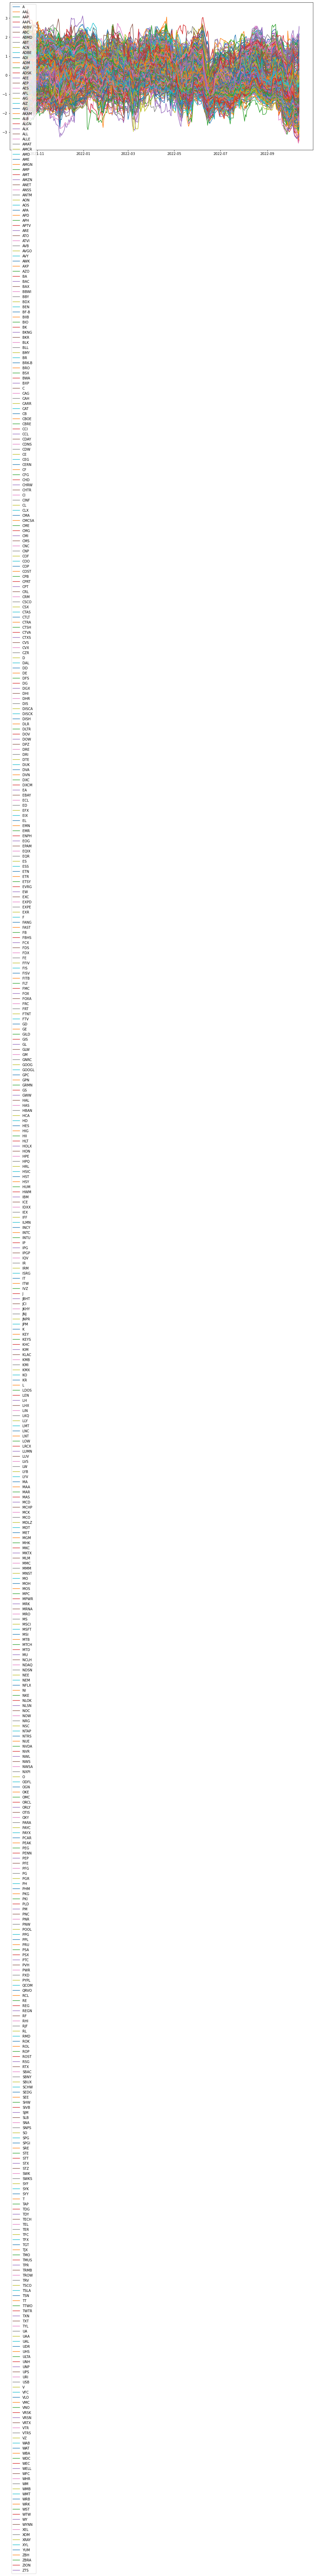

In [10]:
#Plotting the stocks 
plt.figure(figsize=(16,8))
plt.plot(zscore, label= ticker)
plt.legend()

In [11]:
correlation.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.623944,0.723230,0.438740,-0.776532,-0.735024,0.856293,0.775187,0.865465,0.881410,...,0.809720,-0.515841,-0.800643,0.732810,0.940011,0.771209,0.648931,0.889353,0.592529,0.845482
AAL,0.623944,1.000000,0.828603,0.361291,-0.402102,-0.288778,0.779301,0.766047,0.737527,0.766142,...,0.780188,-0.295738,-0.685876,0.783499,0.589930,0.668264,0.833407,0.773029,0.641792,0.712643
AAP,0.723230,0.828603,1.000000,0.611960,-0.416280,-0.395194,0.811379,0.914231,0.896839,0.834346,...,0.820281,-0.345557,-0.802947,0.875183,0.656269,0.811294,0.683866,0.894802,0.733041,0.878363
AAPL,0.438740,0.361291,0.611960,1.000000,0.029571,-0.000814,0.531500,0.593542,0.648847,0.349548,...,0.495632,0.122433,-0.343956,0.488966,0.296885,0.624853,0.253155,0.489847,0.652893,0.546807
ABBV,-0.776532,-0.402102,-0.416280,0.029571,1.000000,0.909931,-0.526110,-0.439239,-0.545287,-0.751781,...,-0.578716,0.634376,0.681947,-0.469329,-0.885467,-0.470956,-0.432278,-0.671524,-0.242828,-0.555726


<AxesSubplot:>

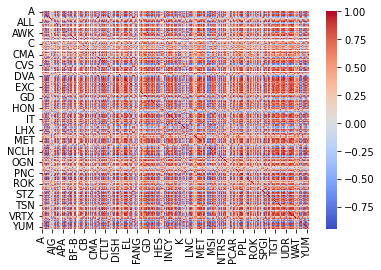

In [12]:
#It Shows the correlation between each stock, it can be used to identify cointegrated pairs
sns.heatmap(correlation, cmap='coolwarm')

In [13]:
zscore.to_csv(f'S&P500 Zscore.csv')

In [14]:
data.Close.to_csv(f'S&P500 Data.csv')

In [15]:
returns.to_csv(f'S&P500 Returns.csv')

In [16]:
correlation.to_csv(f'S&P500 Corr.csv')

In [17]:
total.to_csv(f'S&P500 Market Return.csv')

In [18]:
data.Close.to_csv(f'MarketReturn.csv')